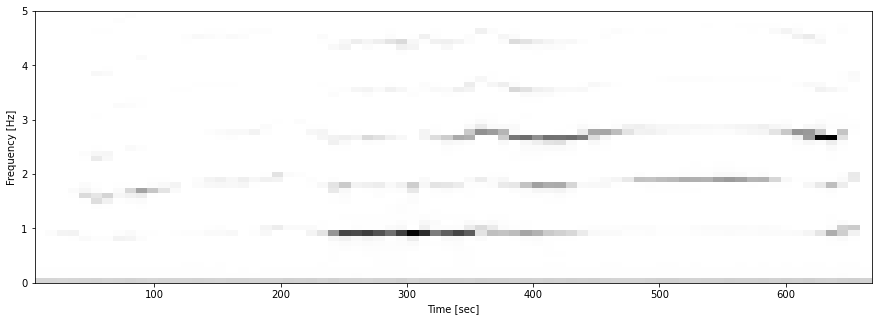

In [3]:
import obspy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

from sac_tools.Sac import Sac

# File and directory names of the .sac file as well as the pole-zero file.
base_dir = "/Volumes/MAC Backup/Final Year Projects/Shinmoedake Data/shinmoedake seismographs/"
station = "EV.SMN"
channel = "wU"  
parent_folder = "110202/11020220h/"
file_name = os.path.join(base_dir, parent_folder, station + "." + channel)
pz_file_name = "/Volumes/MAC Backup/Final Year Projects/Shinmoedake Data/kirishima_invert/tri120p"

# Set the time range for the data.
starttime = pd.to_datetime("20110202 20:43:40")
endtime = pd.to_datetime("20110202 20:55:00")

# read .sac file containing harmonic tremor.
ht = Sac(file_name)   

# load seismometer response.
ht.read_pz_file(pz_file_name)

# convert to df, and plot spectrogram for the time range set above.
df = ht.make_df(start_time = starttime, end_time = endtime, column_name = "smn_u")
ht.spectrogram(nperseg = 1024)

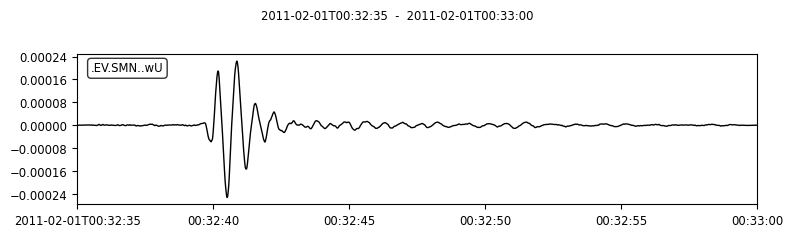

In [2]:
# Load .sac file containing a long period event.
file_name = "/Volumes/MAC Backup/Final Year Projects/Shinmoedake Data/shinmoedake seismographs/110201/11020100h"
file_name = file_name + "/" + station + "." + channel

# Load .sac file data.
lp = Sac(file_name)
# Load pole zero file data.
lp.read_pz_file(pz_file_name)

# Trim the data to the specified time range, and remove seismometer response.
lp.trim("2011-02-01 00:32:35", "2011-02-01 00:33:00")
lp.remove_resp()

# Plot the long period event.
lp.plot()